In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.datasets import make_blobs

In [35]:
df = pd.read_csv("Heart Attack.csv")

In [36]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [37]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [40]:
# df['class'] = df['class'].map({'negative': 0, 'positive': 1})

In [41]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


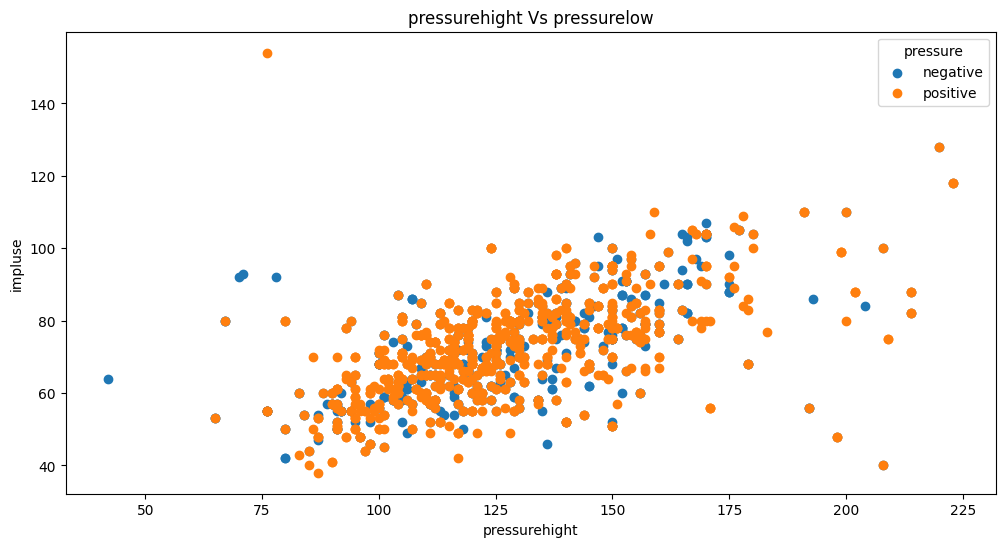

In [42]:
plt.figure(figsize=(12,6))
for pressure, pressure_data in df.groupby('class'):
    plt.scatter(pressure_data['pressurehight'],pressure_data['pressurelow'],label=pressure)

plt.xlabel('pressurehight')
plt.ylabel('impluse')
plt.legend(title="pressure")
plt.title('pressurehight Vs pressurelow')
plt.show()

In [43]:
X = df.drop("class", axis=1)
y = df["class"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SVM model


In [45]:
from sklearn.svm import SVC

In [46]:
model = SVC(kernel='linear',C=1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

C:\Users\jay\AppData\Local\Temp\ipykernel_6380\239273004.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


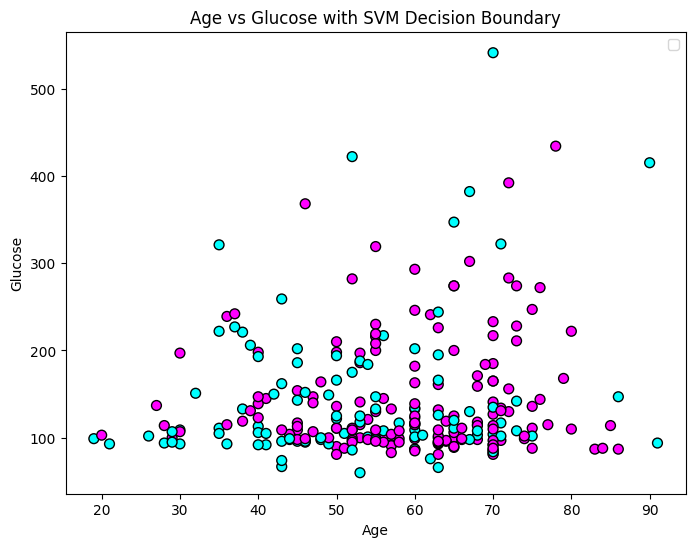

In [56]:
# plt.figure(figsize=(8, 6))
# plt.scatter(y_train[:, 0], y_test[:, 1], c=y, s=50, cmap='age', edgecolors='k')
# plt.xlabel('Age')
# plt.ylabel('Glucose')
# plt.title('Age vs Glucose with SVM Decision Boundary')
from sklearn.preprocessing import LabelEncoder

# Convert 'negative' and 'positive' to numeric labels
label_encoder = LabelEncoder()

# Encode y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ensure X_train and X_test are NumPy arrays if they are pandas DataFrames
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

# Plot data points
plt.figure(figsize=(8, 6))

# Plot training data (e.g., Age vs Glucose)
# plt.scatter(X_train[:, 0], X_train[:, 5], c=y_train_encoded, s=50, cmap='winter', edgecolors='k', label="Train")

# Plot testing data (e.g., Age vs Glucose)
plt.scatter(X_test[:, 0], X_test[:, 5], c=y_test_encoded, s=50, cmap='cool', edgecolors='k')

plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Age vs Glucose with SVM Decision Boundary')
plt.legend()
plt.show()


In [39]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [40]:
plt.scatter(X[:,0],X[:,1],c=y,s=10,cmap="summer")
plot_svc_decision_function(svm_model)

InvalidIndexError: (slice(None, None, None), 0)